# Ruckig Test

In [2]:
!pip install ruckig

/home/salih/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.0.dev-d3170fd is an invalid version and will not be supported in a future release
  warnings.warn(
/home/salih/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/salih/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/salih/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
import ruckig
from pathlib import Path
from ruckig import InputParameter, OutputParameter, Result, Ruckig
from copy import copy
import numpy as np
import matplotlib.pyplot as plt

t	0
Calculation duration: 5.3 [µs]
Trajectory duration: 2.2472 [s]


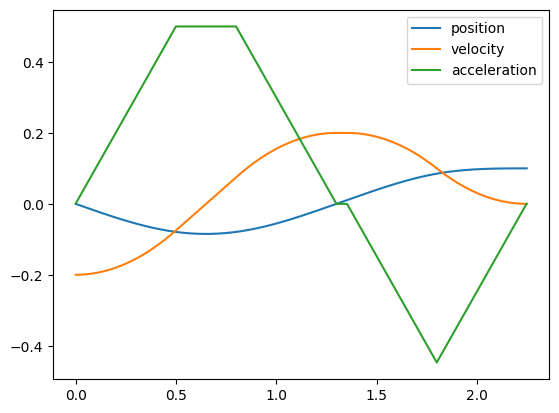

In [7]:
# Create instances: the Ruckig OTG as well as input and output parameters
otg = Ruckig(1, 0.001)  # DoFs, control cycle
inp = InputParameter(1)
out = OutputParameter(1)

# Set input parameters
inp.current_position = [0.0]
inp.current_velocity = [-0.2]
inp.current_acceleration = [0.0]

inp.target_position = [0.1]
inp.target_velocity = [0.0]
inp.target_acceleration = [0.0]

inp.max_velocity = [0.2]
inp.max_acceleration = [0.5]
inp.max_jerk = [1.0]

print('\t'.join(['t'] + [str(i) for i in range(otg.degrees_of_freedom)]))

# Generate the trajectory within the control loop
first_output, out_list = None, []
res = Result.Working
while res == Result.Working:
    res = otg.update(inp, out)

    #print('\t'.join([f'{out.time:0.3f}'] + [f'{p:0.3f}' for p in out.new_position]))
    out_list.append(copy(out))

    out.pass_to_input(inp)

    if not first_output:
        first_output = copy(out)

print(f'Calculation duration: {first_output.calculation_duration:0.1f} [µs]')
print(f'Trajectory duration: {first_output.trajectory.duration:0.4f} [s]')

# Plot the trajectory
out_list[0]

new_position = []
new_velocity = []
new_acceleration = []
new_time = []
for o in out_list:
  new_position.append(o.new_position)
  new_velocity.append(o.new_velocity)
  new_acceleration.append(o.new_acceleration)
  new_time.append(o.time)

plt.plot(new_time, new_position, label="position")
plt.plot(new_time, new_velocity, label="velocity")
plt.plot(new_time, new_acceleration, label="acceleration")
plt.legend()